<a href="https://colab.research.google.com/github/adielws/covid19-questions/blob/master/covid19_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importando *dataset* do Google Drive



In [1]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
#!ls '/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv'
!ls '/content/drive/Shared drives/TRABALHO_POS/FULL.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/Shared drives/TRABALHO_POS/FULL.csv'


In [3]:
import pandas as pd
#data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv', error_bad_lines=False, delimiter=';', encoding="utf-8")
data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/FULL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
data.head(5)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


# Visualizando informações básicas do *dataset*


In [4]:
data.shape

(1658825, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB


In [6]:
data.idioma.unique() # categorias de idiomas

array(['pt', 'en', 'es', 'ar', 'tl', 'fr', 'und', 'nl', 'ja', 'cy', 'th',
       'fa', 'it', 'de', 'tr', 'eu', 'ca', 'ko', 'in', 'ht', 'lt', 'zh',
       'hi', 'lv', 'sv', 'is', 'pl', 'ur', 'sd', 'vi', 'no', 'te', 'cs',
       'ta', 'da', 'ru', 'hu', 'ro', 'et', 'uk', 'el', 'sr', 'fi', 'bn',
       'iw', 'sl', 'bg', 'ne', 'am', 'ps', 'ml', 'gu', 'mr', 'or', 'ckb',
       'si', 'dv', 'my', 'kn'], dtype=object)

In [7]:
data.pais.unique() # categorias de países

array([nan, 'Brazil', 'Ireland', 'Portugal', 'Spain', 'Germany', 'Canada',
       'United States', 'Angola', 'Uganda', 'The Netherlands', 'Japan',
       'United Kingdom', 'Republic of Mozambique', 'Belgium',
       'Kingdom of Saudi Arabia', 'Venezuela', 'Pakistan', 'Indonesia',
       'Chile', 'Senegal', 'Argentina', 'Colombia', 'France', 'Turkey',
       'Austria', 'Paraguay', 'Italy', 'New Zealand', 'Kenya',
       "People's Republic of China", 'Panama', 'Ghana', 'Ecuador',
       'Haiti', 'Australia', 'Mexico', 'Republic of the Philippines',
       'Republic of Croatia', 'South Africa', 'Denmark', 'India',
       'Costa Rica', 'Nigeria', 'Malaysia', 'North Korea', 'Uruguay',
       'Cyprus', 'Egypt', 'Dominican Republic', 'Vietnam', 'Bahrain',
       'El Salvador', 'Switzerland', 'United Arab Emirates', 'Sri Lanka',
       'Cape Verde', 'Slovak Republic', 'Sweden', 'Israel', 'Honduras',
       'Montenegro', 'Thailand', 'Peru', 'Czech Republic', 'Luxembourg',
       'Oman', 'Taiwan

In [8]:
data.sigla.unique() # categorias de siglas

array([nan, 'BR', 'IE', 'PT', 'ES', 'DE', 'CA', 'US', 'AO', 'UG', 'NL',
       'JP', 'GB', 'MZ', 'BE', 'SA', 'VE', 'PK', 'ID', 'CL', 'SN', 'AR',
       'CO', 'FR', 'TR', 'AT', 'PY', 'IT', 'NZ', 'KE', 'CN', 'PA', 'GH',
       'EC', 'HT', 'AU', 'MX', 'PH', 'HR', 'ZA', 'DK', 'IN', 'CR', 'NG',
       'MY', 'KP', 'UY', 'CY', 'EG', 'DO', 'VN', 'BH', 'SV', 'CH', 'AE',
       'LK', 'CV', 'SK', 'SE', 'IL', 'HN', 'ME', 'TH', 'PE', 'CZ', 'LU',
       'OM', 'TW', 'GE', 'IR', 'CI', 'BW', 'UA', 'LB', 'RO', 'KZ', 'TL',
       'BO', 'MO', 'NO', 'CM', 'SG', 'IQ', 'QA', 'JM', 'CD', 'GT', 'EE',
       'CW', 'RU', 'BS', 'KR', 'XK', 'KW', 'GW', 'CU', 'CF', 'TZ', 'PL',
       'VA', 'TT', 'GR', 'GN', 'NI', 'SR', 'JO', 'MA', 'ZW', 'FI', 'GF',
       'AM', 'SI', 'HU', 'GP', 'LA', 'MG', 'AD', 'MC', 'MT', 'TD', 'LT'],
      dtype=object)

In [9]:
data.data.min() # data do tweet mais antigo

'2020-01-01 00:42:12'

In [10]:
data.data.max() # data do tweet mais recente

'2020-07-28 17:19:44'

In [11]:
data.hashtags.describe() # detalhes da coluna hashtags

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

# Analisando a Frequência das Hashtags


Nesta seção, vamos visualizar a frequência das hashtags no nosso dataset. Para isso, vamos utilizar um gráfico conhecido como nuvem de palavras. Nós vamos implementar usando a biblioteca [Wordcloud](https://https://github.com/amueller/word_cloud).

In [12]:
!pip install wordcloud -q

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Nós vamos criar uma série a partir do atributo *hashtag* do dataframe. Nós vamos incluir nessa série apenas os valores não faltantes.

In [14]:
hashtags = data.dropna(subset=['hashtags'])['hashtags']
hashtags.describe()

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

In [15]:
hashtags.unique() # visualizando valores únicos.

array(['[]', "['tvPT']", "['Venezuela']", ...,
       "['IndianWells', 'Covid_19']",
       "['Coronavirus', 'COVID19', 'Venezia', 'Civile']",
       "['FranklinDurationIncomeTrust', 'Stock']"], dtype=object)

Podemos ver que cada item da série é um array de strings, cujos valores são as hashtags de uma linha do dataframe. Portanto, precisamos separar esses valores em strings individuais, para que possamos calcular sua frequência.

Mas antes vamos remover da série os itens cujo valor é um array vazio. Eles são os itens que têm o valor '[]'.

In [16]:
hashtags = hashtags[hashtags != '[]'] # removendo itens que não tem hashtags
hashtags.describe()

count          163256
unique          63837
top       ['COVID19']
freq             9951
Name: hashtags, dtype: object

In [17]:
hashtags.unique() # visualizando valores únicos. Veja que não existe mais o valor '[]'.

array(["['tvPT']", "['Venezuela']", "['Covid_19']", ...,
       "['IndianWells', 'Covid_19']",
       "['Coronavirus', 'COVID19', 'Venezia', 'Civile']",
       "['FranklinDurationIncomeTrust', 'Stock']"], dtype=object)

Agora vamos dividir os arrays em palavras e, por fim.

In [18]:
def split(item):
  "This parses a string of a list of words into an array of individual words"
  tags = str(item).translate({ord(i): None for i in ' []\''})
  return tags.split(',')

hashtags = hashtags.apply(split)
hashtags = np.concatenate(hashtags.values.tolist())

Vamos concatenar todas as palavras em uma só, separando-as com espaço.

Em seguida, criaremos a nuvem de palavras usando a biblioteca Wordcloud.

Por fim, vamos exibi-la usando a biblioteca Matplotlib.

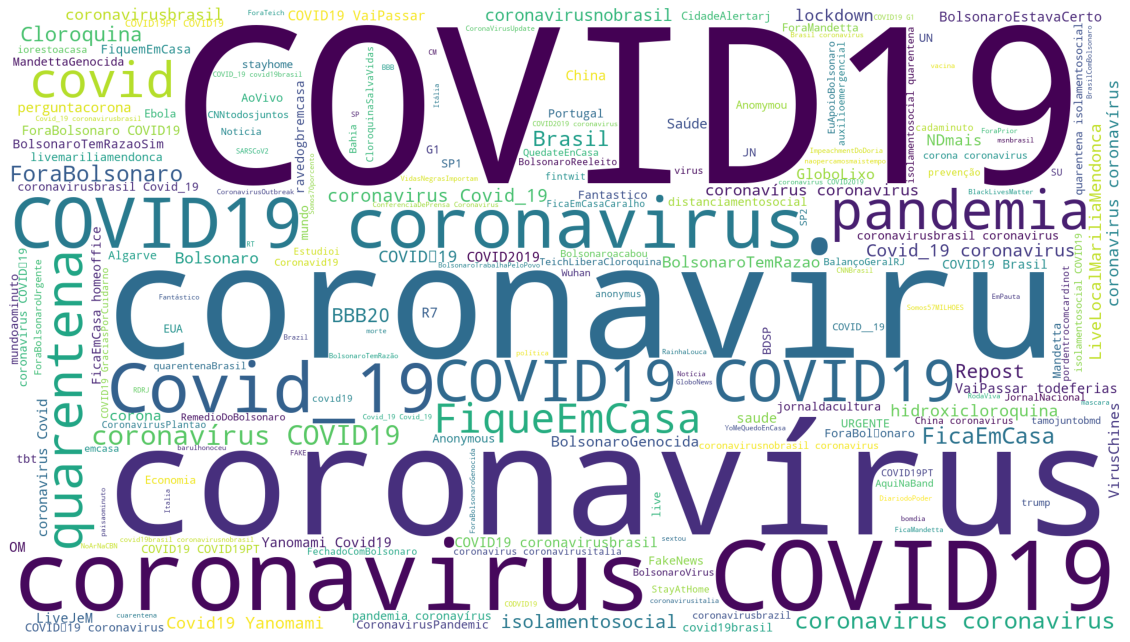

In [19]:
# concatenando as palavras
all_hashtags = " ".join(s for s in hashtags)

# criando a nuvem de palavras
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(all_hashtags)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Observe que há várias ocorrências de tags repetidas, como *COVID19*. Será necessário fazer mais um tratamento nos dados das hashtags para agrupar essas ocorrências repetidas.

Após o tratamento, vamos escrever aqui os resultados. Mas já podemos observar que as hashtags mais postadas foram *#COVID19*, *#coronavirus*, *#FiqueEmCasa*, *#pandemia* e *#quarentena*.

# Gerando *dataset* DuvidasDB com perguntas extraídas do *dataset* original

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
#data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv', error_bad_lines=False, delimiter=';', encoding="utf-8")
data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/FULL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")

In [28]:
data.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [29]:
import re

def get_questions(txt):
  "gets  all the questions that are in the txt"
  return re.findall('[A-Za-z].*\?', txt)

In [30]:
# get tweet series
tweets = data.texto
tweets.head(5)

0    @BolsonaroSP Cade o fundão deputado??? Congres...
1    Em ação preventiva, o Governo do Estado suspen...
2    Incrível como os defensores do fim do distanci...
3    Fumaça de cigarro pode propagar coronavírus? h...
4    🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
Name: texto, dtype: object

In [ ]:
# apply 'get_questions' in all tweets
questions_arrays = tweets.apply(get_questions)
print(questions_arrays)

A fazer: aplicar a função de extrair perguntas sobre o conteúdo completo do tweet. Para isso, será necessário baixar o texto usando a URL do tweet. Para isso, vamos obter as short URLs dos tweets que as têm.

In [ ]:
# obtain full content for tweet series
def has_URL(tweet):
  "Scan through string looking for a tweet URL, returning True if it has or False otherwise."
  return re.search('https.*$', tweet) != None  

def get_URL(tweet):
  return re.findall('https.*$', tweet)

has = tweets[tweets.apply(has_URL)]
urls = has.apply(get_URL)
display(urls)

Abaixo, vamos elaborar uma estratégia para obter o texto completo do tweet usando sua short URL.

In [ ]:
import tweepy

consumer_key = "vXpGl6obnpLwkP6OBqxIgvBX3"
consumer_secret = "rIOwNZ80HMqz9fkpKQ8XompdoCC0f11YmdI3jXTH2dyUM30rIM"

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)

# Por enquanto, vou obter o texto completo usando o ID do tweet. 
# Posteriormente, desejo obter o texto completo a partir da short URL.
def get_full_text_using_id(tweet_id):
  status = api.get_status(tweet_id, tweet_mode = "extended")
  return status.full_text

tweet_id = 1240115265423147017
print(get_full_text_using_id(tweet_id))

#**Processando as palavras das frases**

In [25]:
interrogacao ='?'
data['interrogativa'] = np.where(data['texto'].str.find(interrogacao)!= -1, True, False)
data.head()

KeyError: ignored

In [ ]:
data['interrogativa'].value_counts()

In [ ]:
df1 = data[data['interrogativa'] != False]
df1.head()

In [ ]:
textosPuros = df1['texto']
print(textosPuros)

In [ ]:
frases = textosPuros.str.lower()
print(frases)

In [ ]:
textosQuebrados = [nltk.tokenize.word_tokenize(frase) for frase in frases] # Quebra por palavras(pontuações)
print(textosQuebrados)

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')

dicionario = set()

for lista in textosQuebrados:
    validas = [stemmer.stem(palavra) for palavra in lista if len(palavra) > 2 and palavra not in stopwords and palavra.find("//") == -1]
    dicionario.update(validas)

totalDePalavras = len(dicionario)

print("Quantidade toda de palavras distintas:", totalDePalavras)
print(dicionario)

In [ ]:
tuplas = zip(dicionario, range(totalDePalavras))#Gera a relação PALAVRA & INDICE

tradutor = {palavra: indice for palavra, indice in tuplas}
print("TRADUTOR!", tradutor)

In [ ]:
sequencia_palavras = []
for e in tradutor:
    sequencia_palavras.append(e)

In [ ]:
def vetorizar_texto(texto, tradutor, stemmer): # Representando cd.. a frase em um array
    vetor = [0] * len(tradutor) # vetor com N POSIÇÕES ## Constroi o vetor para cada FRASE, traduz uma palavra para uma posição do vetor
    for palavra in texto:
        if len(palavra) > 0:# Comparando a palavra com a sua raíz
            raiz = stemmer.stem(palavra)
            if raiz in tradutor:
                posicao = tradutor[raiz]
                vetor[posicao] += 1
    return vetor
vetoresDeTexto = [vetorizar_texto(texto, tradutor, stemmer) for texto in textosQuebrados] # Função para vetorizar os textos, passa por todas as frases
resultado = [sum(x) for x in zip(*vetoresDeTexto)]
print(resultado)

In [ ]:
data = {
    'palavra' : sequencia_palavras,
    'repeticao' : resultado
}

palavra_repeticao = pd.DataFrame(data,columns=['palavra','repeticao'])

print("DATA FRAME: \n", palavra_repeticao)

In [ ]:
palavra_repeticao.sort_values(['repeticao'], ascending=False).head(50)

In [ ]:
print("Quantidade TOTAL de radicais das palavras: ", len(palavra_repeticao))

In [ ]:
df1.head()

#**LUGARES**

In [ ]:
lugares = df1[df1['lugar'].notnull()]

lugares.head()

In [ ]:
cidades = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CIDADES-ESTADOS.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
cidades.head(5)

In [ ]:
localizacao = pd.merge(lugares, cidades, how='left', left_on='lugar', right_on='nome_cidade')
localizacao.head()

In [ ]:
localizacao = localizacao.drop(['apelido', 'texto','retweet','seguidores','idioma','hashtags','interrogativa'],axis=1)
localizacao.head()

In [ ]:
localizacao.regiao.value_counts('regiao')

In [ ]:
localizacao.groupby('regiao').regiao.count()

# **TEMPO**

In [ ]:
import datetime
localizacao['data'].dtype

localizacao['data'] = pd.to_datetime(localizacao['data'], format='%d/%m/%Y %H:%M')


In [ ]:
conditions = [
    (localizacao.data.dt.hour >= 0) & (localizacao.data.dt.hour <=6),
    (localizacao.data.dt.hour > 6) & (localizacao.data.dt.hour <=12),
    (localizacao.data.dt.hour > 12) & (localizacao.data.dt.hour <=18),
    (localizacao.data.dt.hour > 18) & (localizacao.data.dt.hour <=23)
    ]
values = ['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE']

localizacao['partes_dia'] = np.select(conditions, values)
localizacao['dia_da_semana'] = localizacao.data.dt.day_name()

localizacao.head()

In [ ]:
localizacao.dtypes

In [ ]:
localizacao.groupby('partes_dia').regiao.count()

In [ ]:
localizacao.groupby(['regiao','partes_dia']).regiao.size()

In [ ]:
mapa = localizacao.groupby(['nome_cidade']).regiao.size()
mapa.head(20)

In [ ]:
mapa = localizacao.groupby(['regiao','nome_cidade']).regiao.size()
mapa.head(20)

In [ ]:
mapa.to_frame()

In [ ]:
mapa.dtypes

In [ ]:
#mapa.columns

In [ ]:
import folium 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data

In [ ]:
m = folium.Map(location=[-16.1237611, -59.9219642],
    zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000.0,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m
# Save it as html
#m.save('mymap.html')